In [ ]:
import json
import numpy as np
import pandas as pd
import requests
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

URL = 'https://api.foursquare.com/v2'
CLIENT_ID = 'KZTFEZ202SFTOBQJWMKP1I1PGLNIXCZXEKAFFKWV2UG1OMGQ'
CLIENT_SECRET = 'TAIJYPELLZ55MNTBEKTWJD4PZCH3TXXHDKKHDJR3R0CSMIKG' 
VERSION = '20180604'


def get_latlon(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    return f'{location.latitude},{location.longitude}'


def get_details(venue_id):
    url = f'{URL}/venues/{venue_id}'
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION,
    )
    resp = requests.get(url=url, params=params)
    print(resp)
    data = json.loads(resp.text)
    return data


def get_primary_category(categories):
    primary_categories = list(c['name'] for c in categories if c['primary'])
    return primary_categories[0] if primary_categories else None


def process(data):
    df = pd.io.json.json_normalize(data['response']['venues'])
    df['category'] = df['categories'].apply(lambda x: get_primary_category(x))
    # for i, row in df.iterrows():
    #     details = dict(get_details(row['id'])['response']['venue'])
    #     df.loc[df['id'] == row['id'], 'rating'] = details.get('rating')
    #     df.loc[df['id'] == row['id'], 'likes'] = details['likes']['count']
    # mask = (df['likes'] > 0) & (~df['rating'].isnull())
    cols = ['id', 'name', 'category', 'location.address', 'location.distance', 'location.lat', 'location.lng',]
    return df[cols]
    return df


def search(query, address, limit=2, radius=3000):
    url = f'{URL}/venues/search'
    params = dict(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        v=VERSION,
        ll=get_latlon(address),
        query=query,
        limit=limit,
        radius=radius
    )
    resp = requests.get(url=url, params=params)
    data = json.loads(resp.text)
    return process(data)

In [ ]:
limit = 100
df_burgers = search('Burger', 'E14 9BP, London, UK', limit=limit)
df_sushi = search('Sushi', 'E14 9BP, London, UK', limit=limit)
df_pizza = search('Pizza', 'E14 9BP, London, UK', limit=limit)
df_breakfast = search('breakfast', 'E14 9BP, London, UK', limit=limit)
df_sandwich = search('Sandwich', 'E14 9BP, London, UK', limit=limit)


In [ ]:
Food = pd.concat([df_burgers, df_sushi, df_pizza, df_breakfast, df_sandwich], ignore_index=True)
Food

,id,name,category,location.address,location.distance,location.lat,location.lng
0,5cadee50f8cbd4002c354481,Beer + Burger,Beer Bar,The O2,1749,51.500940,0.005363
1,4bc3002c920eb71384cf1c2c,Burger King,Fast Food Restaurant,Food Court Surrey Quays Centre,1949,51.495479,-0.047284
2,4c90d1b5b641236af50e7c79,Gourmet Burger Kitchen,Burger Joint,"Unit 22, The O2, Peninsula Square",1655,51.502963,0.003259
3,4bc9e939b6c49c74423a8f91,Gourmet Burger Kitchen,Burger Joint,"45 Greenwich Church Street, Greenwich",2010,51.481631,-0.010284
4,57508ede498efe9da7ad7c38,Burger & Lobster,Burger Joint,18 Hertsmere Rd,972,51.507288,-0.022376
...,...,...,...,...,...,...,...
112,4e9428b761afe52cf38d5f0a,Birleys Sandwiches Baguette Kiosk,Sandwich Place,Canada Square,682,51.504797,-0.018316
113,4fc54757e4b0662a32a4b526,Brunches Sandwich Bar & Deli,None,NaN,3361,51.523254,-0.047931
114,4d5535d09e508cfae0e5fc9a,Peckish Sandwich Bar,Sandwich Place,315 Whitechapel Rd,3562,51.519626,-0.058579
115,4e87a601be7b5a660d6c770f,Cafe Fresh Sandwich Bar,None,Globe Road,3849,51.514847,-0.068783


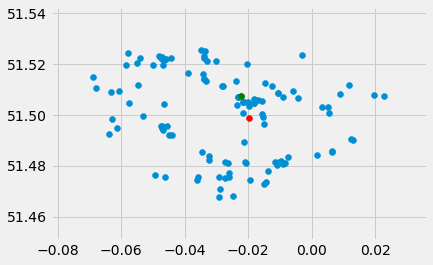

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(Food['location.lng'], Food['location.lat'])
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode('E14 9BP, London, UK')
ax.scatter([location.longitude], [location.latitude], c='r')
ax.scatter([-0.022376], [51.507288], c='g')

In [ ]:
 df.loc[df['id'] == '58ac7b436431e5283d7c0286', 'rating'] = 2
df


,id,name,category,rating,likes,location.address,location.distance
0,55412714498eba342dfd063f,Sticks'n'Sushi,Sushi Restaurant,8.7,153.0,1 Crossrail Place,834
1,54caa6f9498e6c4d94e01bcd,Sticks'n'Sushi,Sushi Restaurant,8.5,93.0,1 Nelson Road,2103
2,58af108dabf632097b5e32bd,Sushi Fresh,Japanese Restaurant,NaN,0.0,108 Salmon Lane,1957
3,5131c941e4b09cc35d6698ba,River Sushi,Sushi Restaurant,NaN,0.0,NaN,1377
4,5b6830542f97ec002cbad0c3,Nuha Sushi,Sushi Restaurant,NaN,0.0,22 Kerbey street,1560


In [ ]:
get_primary_category(df['categories'][0])

'Modern European Restaurant'

In [ ]:
CLIENT_ID = 'KZTFEZ202SFTOBQJWMKP1I1PGLNIXCZXEKAFFKWV2UG1OMGQ' # your Foursquare ID
CLIENT_SECRET = 'TAIJYPELLZ55MNTBEKTWJD4PZCH3TXXHDKKHDJR3R0CSMIKG' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KZTFEZ202SFTOBQJWMKP1I1PGLNIXCZXEKAFFKWV2UG1OMGQ
CLIENT_SECRET: TAIJYPELLZ55MNTBEKTWJD4PZCH3TXXHDKKHDJR3R0CSMIKG


In [ ]:
search_query = 'Cafe'
radius = 500
print(search_query + ' .... OK!')

Cafe .... OK!


In [ ]:
address = 'E14 9BP, London, UK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.49872516705851 -0.019634022722880767


In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=KZTFEZ202SFTOBQJWMKP1I1PGLNIXCZXEKAFFKWV2UG1OMGQ&client_secret=TAIJYPELLZ55MNTBEKTWJD4PZCH3TXXHDKKHDJR3R0CSMIKG&ll=51.49872516705851,-0.019634022722880767&v=20180604&query=Cafe&radius=500&limit=30'